## Line sweep triangulation of a point cloud

### The basic approach to the triangulation of the planar point cloud

The basic approach to the line-sweep triagulation of a planar point cloud was described in the [4th week problem sessions](https://ucilnica.fri.uni-lj.si/pluginfile.php/227887/mod_resource/content/2/tda-2425-vaje-04.pdf) (tasks 1 and 2). We didn't finish task 2, but the *Julia* file with finished tasks 1 and 2 is [available](https://ucilnica.fri.uni-lj.si/pluginfile.php/227918/mod_resource/content/2/line_sweep.jl). This file contains three functions:

- `do_segments_intersect(AB, CD)` returns a boolean value (`true` or `false`) depending on whether the segments `AB` and `CD` intersect or not. `AB` and `CD` are assumed to be $2x2$ matrices with columns corresponding to spatial vectors of the initial and final point on the segment. (General position is assumed, so there are no additional checks for special cases.) 
- `line_sweep(points)` returns the triangulation obtained via line sweep along the $x$-axis. The argument `points` is assumed to be a list of $2$-tuples of floats, e.g. `points = [(1.4142, 2.1), (0.3, -1.1), (2, 3.14)]`. The function returns a list of abstract simplices (in no particular order) presented as $1$-, $2$- and $3$-tuples. The numbers in those tuples correspond to the position of a particular point in the list `points`. (We could argue whether this is a good approach or not. Well, it is one possible approach. Also, general position assumption persists.)
- `visual_test_ls(num_points)` generates `num_points` uniformly distributed random points in the square $[0, 1] \times [0, 1]$, performs the line sweep and then plots the result (vertices and edges of the triangulation). *Julia* package plots needs to be loaded beforehand to use this function. (You can load it by typing `using Plots` in the *Julia* REPL. *Julia* will ask you to confirm the installation if you don't have that package yet.)

### A quick walkthrough (example usage)

Load the *Julia* file and the `Plots` package:

In [1]:
include("line_sweep.jl")

visual_test_ls (generic function with 1 method)

In [2]:
using Plots

Test the three functions:

In [3]:
AB = [[-1; 1] [1; -1]]

2×2 Matrix{Int64}:
 -1   1
  1  -1

In [4]:
CD = [[0; 0] [1; 1]]

2×2 Matrix{Int64}:
 0  1
 0  1

In [5]:
do_segments_intersect(AB, CD)

true

In [6]:
line_sweep([(rand(), rand()) for n in 1:5])

15-element Vector{Any}:
 4
 1
  (4, 1)
 5
  (4, 5)
  (1, 5)
  (4, 1, 5)
 3
  (1, 3)
  (1, 5, 3)
  (5, 3)
 2
  (3, 2)
  (3, 5, 2)
  (5, 2)

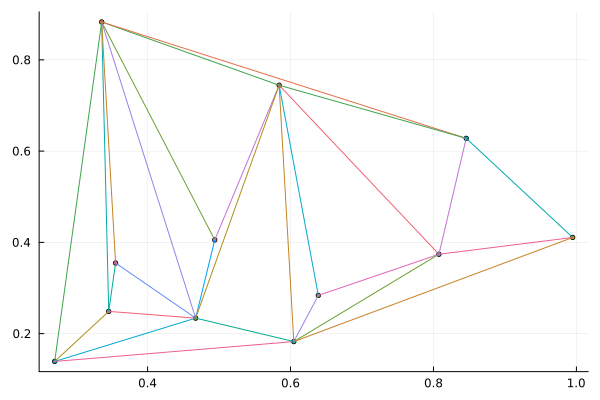

In [7]:
visual_test_ls(12)

### Possible improvements and alternative approaches

- Note that a boundary vertex $V \in B$ is visible if and only if it is a vertex of a visible boundary edge. Hence, keeping track 
of both, visible boundary vertices and visible boundary edges, is redundant. Improve the code to only keep track of visible boundary 
edges.
- There is another test that can be used to test for visibility of boundary edges. The first three points do not only determine 
the first triangle, they also determine the orientation of that triangle. If we are careful, that orientation (essentially the order 
of vertices in $B$) will be maintained at each step. The edge $V_iV_{i+1}$ is then visible from $T$ if and only if the triangle 
$TV_iV_{i+1}$ is oriented consistently with the currently constructed polygon. Use this to determine visible edges (and, hence, 
visible vertices).
- Line sweep can be done in any direction, not only in the direction of the $x$-axis. Add the *sweep direction* as an argument 
to the *Julia* `line_sweep` function. The sweep direction is given by a (not-necessarily normalized) two-component vector 
$\mathbf{e}$. (In case of a sweep in the direction of the $x$-axis this vector is $\mathbf{e} = [1, 0]^\mathsf{T}$.)